In [69]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas as hvplot
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from hvplot.plotting import scatter_matrix

In [70]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("data/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [71]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data


In [72]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file\
features = market_data_df.select_dtypes(include=['float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [73]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_market_data_df.sample(n=5)

# Copy the crypto names from the original data
coin_ids = market_data_df.index

# Set the coinid column as index
#! coin_id is already the index
scaled_market_data_df=scaled_market_data_df.set_index(coin_ids)

# Display sample data
scaled_market_data_df.sample(n=5)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550
okb,-0.923203,-1.437359,-0.629963,-0.460558,-0.058504,-0.457283,-0.166900


<!-- ### Find the Best Value for k Using the Original Scaled DataFrame. -->


**Verify correct index placement**


In [74]:
scaled_market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [75]:
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [76]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_range = range(1,11)


# Create an empty list to store the inertia values
wcss = [] # within-cluster sum of square

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_range:
  cluster = KMeans(n_clusters=k, random_state=42)
  cluster = cluster.fit(scaled_market_data_df)
  wcss.append(cluster.inertia_)

# Create a dictionary with the data to plot the Elbow curve
inertias = {'k': list(k_range), 'inertia': wcss}
print(inertias)

# Create a DataFrame with the data to plot the Elbow curve
inertias_df = pd.DataFrame(inertias)

# Display the DataFrame
inertias_df

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'inertia': [287.0, 212.1233420748626, 170.19357087970297, 79.02243535120977, 71.0979135124442, 66.1088267804475, 54.488123156241166, 43.224692666580424, 32.86088447122681, 28.404884636873092]}


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


<Axes: xlabel='k'>

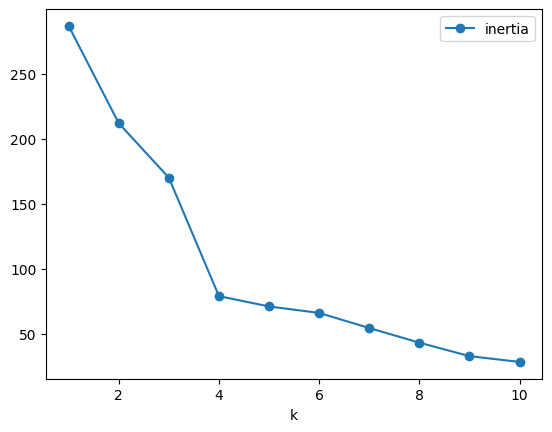

In [77]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
inertias_df.plot(kind='line', marker='o', x='k', y='inertia')

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

**Proof:** Setting k_range to 1,5 still return the graph with the bend starting at 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.


In [78]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=42, init='k-means++')

In [79]:
# Fit the K-Means model using the scaled data
"""
  The instructions in this cell do not match the instructions in the module Requirements
"""
k_model = k_model.fit(scaled_market_data_df)

In [80]:
# Predict the clusters to group the cryptocurrencies using the scaled data
augury = k_model.predict(scaled_market_data_df)

# View the resulting array of cluster values.
print(augury)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [81]:
# Create a copy of the DataFrame
scaled_market_data_df_copy = scaled_market_data_df.copy()

In [82]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_df_copy['cluster'] = augury

# Display sample data
scaled_market_data_df_copy.sample(n=5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570,2
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
cdai,0.180851,-0.704931,-0.001816,-0.143237,0.016060,-0.551146,-0.282310,2
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

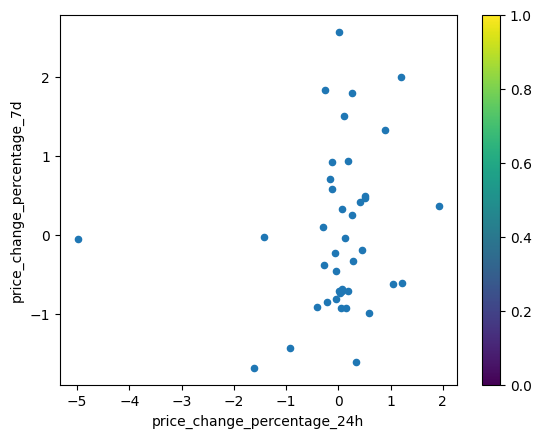

In [83]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_data_df.plot(x="price_change_percentage_24h", y="price_change_percentage_7d", kind='scatter', colorbar='rainbow')

### Optimize Clusters with Principal Component Analysis.


In [84]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3, random_state=42)

In [85]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_fitted_market_data_df = pd.DataFrame(pca.fit_transform(scaled_market_data_df))

# View the first five rows of the DataFrame.
pca_fitted_market_data_df.head(5)

,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [86]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
variance = pca.explained_variance_ratio_
total_variance = variance.sum()
print(variance)
print(total_variance)

[0.3719856  0.34700813 0.17603793]
0.8950316570309842


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** .895 > 89.5%


In [87]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_fitted_market_data_df)
pca_df = pca_df.set_axis(coin_ids)
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data
pca_df.sample(n=5)

,0,1,2
coin_id,,,
dash,-0.613923,-0.479337,0.339565
cosmos,-0.306272,0.703415,1.714224
chainlink,-0.450711,0.517699,2.846143
ethereum,-0.458261,0.458466,0.952877
stellar,-0.489015,-0.732719,-0.062543


### Find the Best Value for k Using the PCA Data


In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
pca_k_range = range(1,11)

# Create an empty list to store the inertia values
pca_wcss = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in pca_k_range:
    kluster = KMeans(n_clusters=k, random_state=42)
    kluster = kluster.fit(pca_df)
    pca_wcss.append(kluster.inertia_)
    
# Create a dictionary with the data to plot the Elbow curve
pca_inertias = {'k': list(pca_k_range), 'inertia': pca_wcss}

# Create a DataFrame with the data to plot the Elbow curve
pca_inertias_df = pd.DataFrame(pca_inertias)

# Display the DataFrame
pca_inertias_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


<Axes: xlabel='k'>

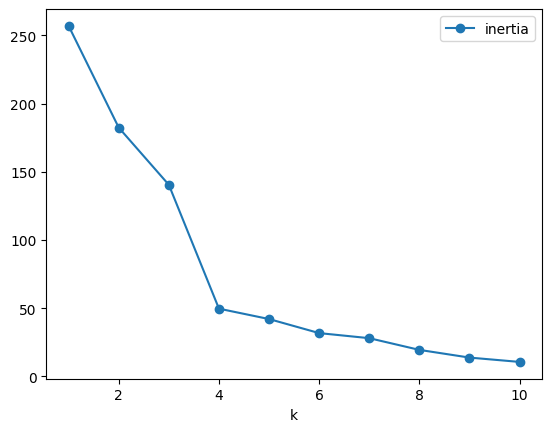

In [89]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_inertias_df.plot(kind='line', marker='o', x='k', y='inertia')

#### Answer the following questions:

- **Question:** What is the best value for `k` when using the PCA data?

  - **Answer:** 4

- **Question:** Does it differ from the best k value found using the original data?

  - **Answer:** Nope


### Cluster Cryptocurrencies with K-means Using the PCA Data


In [90]:
# Initialize the K-Means model using the best value for k
pca_k_model = KMeans(n_clusters=4, random_state=42, init='k-means++')

In [91]:
# Fit the K-Means model using the PCA data
pca_k_model = pca_k_model.fit(pca_inertias_df)

In [92]:
# Predict the clusters to group the cryptocurrencies using the PCA data
augury = pca_k_model.predict(pca_inertias_df)

# Print the resulting array of cluster values.
print(augury)

[2 1 1 0 0 0 3 3 3 3]


In [93]:
# Create a copy of the DataFrame with the PCA data
pca_inertias_df_copy = pca_inertias_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_inertias_df_copy['kluster'] = augury


# Display sample data
pca_inertias_df_copy.sample(n=5)

,k,inertia,kluster
9,10,10.630648,3
3,4,49.665497,0
7,8,19.451747,3
1,2,182.339530,1
5,6,31.749005,0


Axes(0.125,0.11;0.775x0.77)


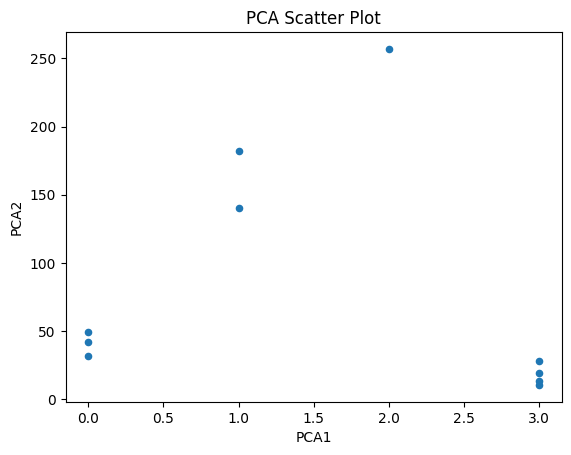

In [102]:
scatter = pca_inertias_df_copy.plot(
  kind='scatter',
  x="kluster", 
  y="inertia",
  title='PCA Scatter Plot',
  xlabel='PCA1',
  ylabel='PCA2'
)

print(scatter)

In [95]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.


:NdOverlay   [Variable]
   :Scatter   [coin_id]   (value,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d)

In [ ]:
scaled_market_data_df.hvplot.scatter(
  hover_cols=[
    "price_change_percentage_24h",
    "price_change_percentage_7d",
    "price_change_percentage_14d",
    "price_change_percentage_30d",
    "price_change_percentage_60d",
    "price_change_percentage_200d",
    "price_change_percentage_1y",
    "cluster"
    ],
  by='cluster',
  legend='top'
  )

In [96]:
scatter_matrix(market_data_df, alpha=1)

:GridMatrix   [X,Y]
   :Histogram   [price_change_percentage_7d]   (Count)

### Determine the Weights of Each Feature on each Principal Component


In [97]:
# Use the columns from the original scaled DataFrame as the index.

#### Answer the following question:

- **Question:** Which features have the strongest positive or negative influence on each component?

- **Answer:**
